In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from bayes_opt import BayesianOptimization

In [60]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [62]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


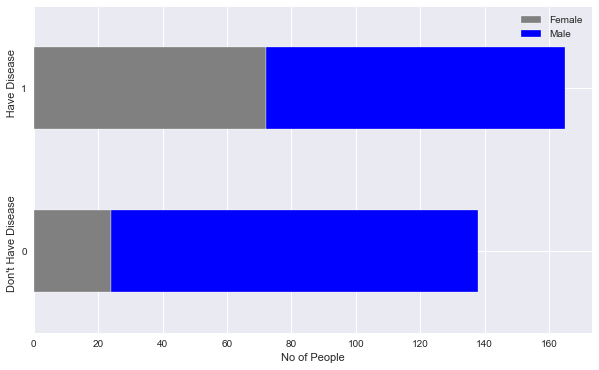

In [63]:
pd.crosstab(df.target, df.sex).plot(kind = 'barh', figsize = (10, 6), color = ["grey", "blue"], stacked=True)
plt.xlabel("No of People")
plt.ylabel("Don't Have Disease                          Have Disease")
plt.legend(["Female", "Male"])
plt.show()

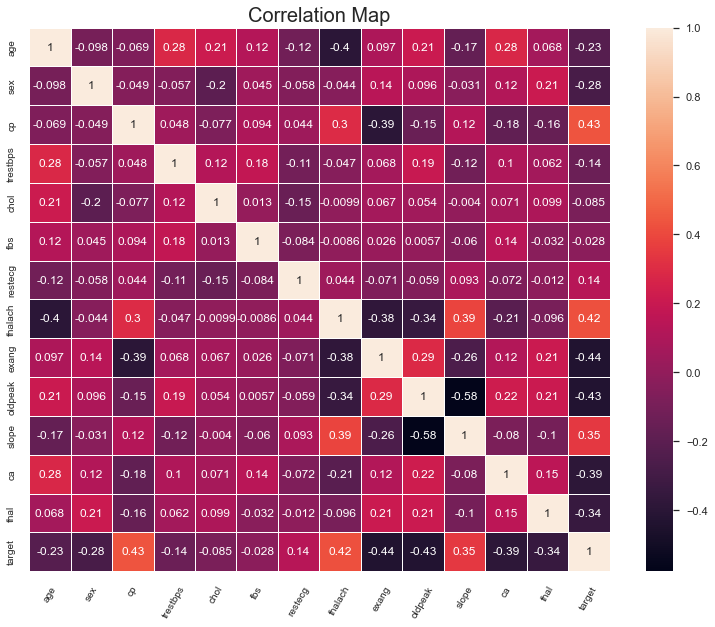

In [64]:
corr = df.corr()
sn.set(rc={'figure.figsize': (13,10)})
sn.heatmap(corr, annot=True, linewidths=.7)
plt.xticks(rotation=60, size=10)
plt.yticks(size=10)
plt.title('Correlation Map', size=20)
plt.show()

In [65]:
X_cols = df.columns[:-1]
X = df[X_cols]
y = df['target']

In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, stratify=y)

In [67]:
def score_GB(learning_rate, n_estimators):
    params = {'learning_rate': learning_rate,
              'n_estimators': int(n_estimators)}

    model = GradientBoostingClassifier(learning_rate=params['learning_rate'],
                                     n_estimators=params['n_estimators'])
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    F1 = f1_score(preds, y_valid)

    return F1

In [68]:
GB_model_opt = BayesianOptimization(score_GB, {'learning_rate': (0.001, 0.5),
                                                'n_estimators': (100, 200) })

In [69]:
GB_results = GB_model_opt.maximize(n_iter=50, init_points=10, acq='ei')

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  1        |  0.7529   |  0.4641   |  107.5    |
|  2        |  0.7442   |  0.2253   |  101.2    |
|  3        |  0.7586   |  0.1231   |  183.8    |
|  4        |  0.7674   |  0.3295   |  185.8    |
|  5        |  0.747    |  0.3629   |  111.2    |
|  6        |  0.7586   |  0.1631   |  161.8    |
|  7        |  0.7674   |  0.07966  |  178.1    |
|  8        |  0.7619   |  0.4982   |  130.6    |
|  9        |  0.7586   |  0.3989   |  159.0    |
|  10       |  0.7727   |  0.1554   |  107.2    |
|  11       |  0.7674   |  0.2395   |  110.5    |
|  12       |  0.7865   |  0.02585  |  106.4    |
|  13       |  0.7586   |  0.3543   |  163.9    |
|  14       |  0.7674   |  0.3677   |  173.7    |
|  15       |  0.7619   |  0.3601   |  192.8    |
|  16       |  0.7674   |  0.1032   |  104.4    |
|  17       |  0.7586   |  0.4252   |  139.3    |
|  18       |  0.8043   |  0.008979 |  190.1    |


In [70]:
params = GB_model_opt.max['params']
params['n_estimators'] = int(params['n_estimators'])
print(params)

{'learning_rate': 0.008979213787694562, 'n_estimators': 190}


In [71]:
model_GB = GradientBoostingClassifier(learning_rate=params['learning_rate'],
                                      n_estimators=params['n_estimators'])

In [72]:
model_GB.fit(X_train, y_train)
preds_GB = model_GB.predict(X_valid)

In [74]:
print("Accuracy:{}".format(accuracy_score(preds_GB,y_valid)))
print("Precision:{}".format(precision_score(preds_GB,y_valid)))
print("Recall:{}".format(recall_score(preds_GB,y_valid)))
print("F1 Score:{}".format((f1_score(preds_GB,y_valid))))


Accuracy:0.7631578947368421
Precision:0.9024390243902439
Recall:0.7254901960784313
F1 Score:0.8043478260869564


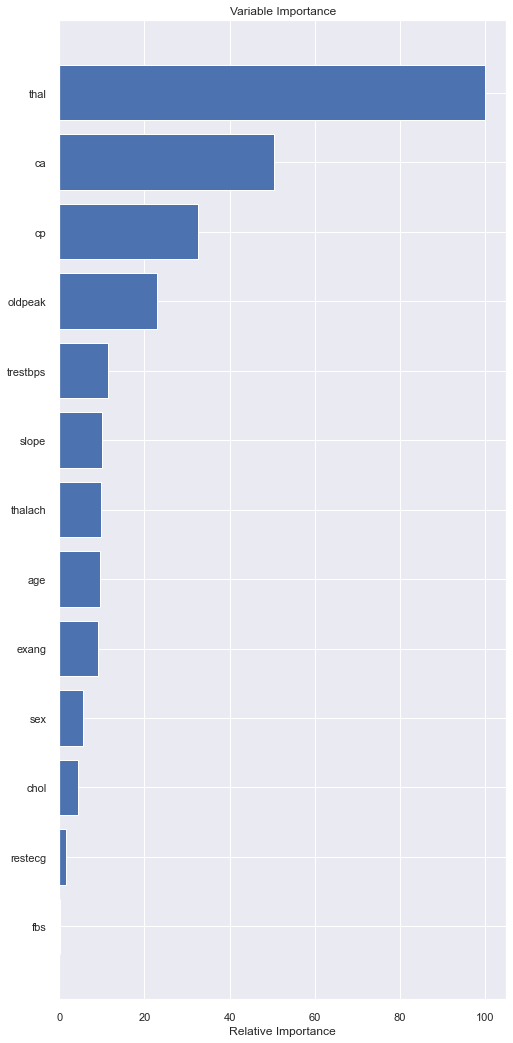

In [78]:
feature_importance = model_GB.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()